# Lungs Tumor Segmentation

In [35]:
from src.data_module import DecathlonDataModule
from monai.utils import first

In [36]:
dm = DecathlonDataModule(
        root_dir="./data",
        task="Task06_Lung",
        batch_size=1,
        num_workers=0,
    )

dm.setup()

2024-04-14 16:49:19,008 - INFO - Verified 'Task06_Lung.tar', md5: 8afd997733c7fc0432f71255ba4e52dc.
2024-04-14 16:49:19,010 - INFO - File exists: data/Task06_Lung.tar, skipped downloading.
2024-04-14 16:49:19,013 - INFO - Non-empty folder exists in data/Task06_Lung, skipped extracting.


Loading dataset: 100%|██████████| 51/51 [03:59<00:00,  4.70s/it]


2024-04-14 16:53:48,149 - INFO - Verified 'Task06_Lung.tar', md5: 8afd997733c7fc0432f71255ba4e52dc.
2024-04-14 16:53:48,156 - INFO - File exists: data/Task06_Lung.tar, skipped downloading.
2024-04-14 16:53:48,158 - INFO - Non-empty folder exists in data/Task06_Lung, skipped extracting.


Loading dataset: 100%|██████████| 12/12 [01:09<00:00,  5.80s/it]


In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_slices_with_segmentation(image, label, num_slices=16):
    """
    Plots random slices where each slice has segmentation values in the label.

    Parameters:
        image (torch.Tensor): 3D tensor representing the image.
        label (torch.Tensor): 3D tensor representing the segmentation label.
        num_slices (int): Number of slices to plot. Default is 16.
    """

    max_slices = image.shape[-1]
    random_slice_indices = np.random.choice(max_slices, size=min(num_slices, max_slices), replace=False)

    cols = 4
    rows = len(random_slice_indices) // cols

    fig, axes = plt.subplots(rows, cols, figsize =(16,16))
    axes = axes.flatten()

    for i, idx in enumerate(random_slice_indices):
        slice_image = image[:,:,idx]
        slice_label = label[:,:,idx]

        # Plot the image slice
        axes[i].imshow(slice_image, cmap='gray')
        axes[i].set_title(f"Slice {idx + 1}")

        # Overlay segmentation mask on the image
        axes[i].imshow(slice_label, cmap='jet', alpha=0.5)

        # axes[i].axis('off')

    plt.tight_layout()
    plt.show()


image shape: torch.Size([512, 512, 589]), label shape: torch.Size([512, 512, 589])


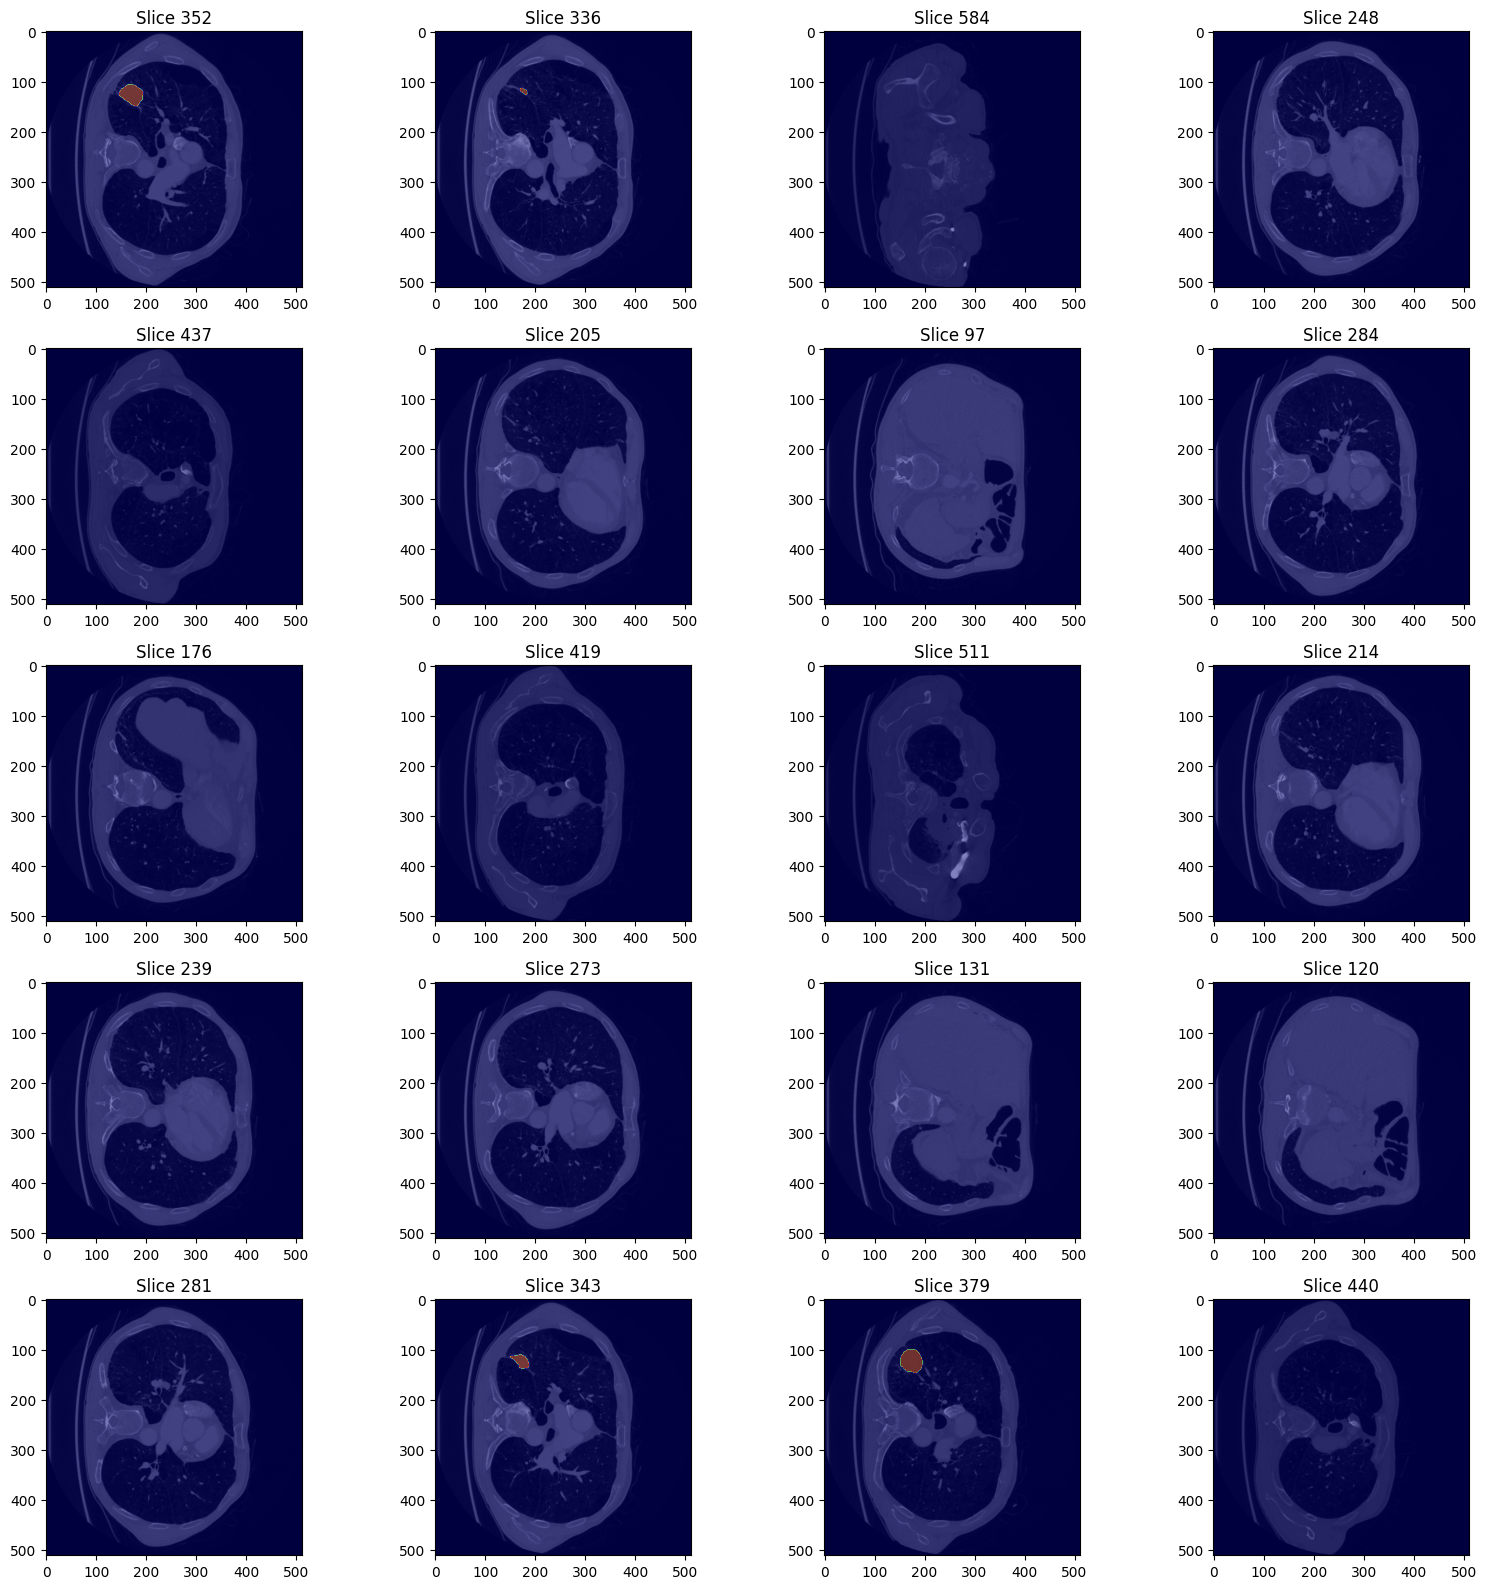

In [46]:
# Plot random 16 slices
check_data = first(dm.train_dataloader())
image, label = (check_data["image"][0][0], check_data["label"][0][0])
print(f"image shape: {image.shape}, label shape: {label.shape}")
plot_random_slices_with_segmentation(image, label, num_slices=20)